#### https://dzone.com/articles/time-series-data-analysis-tutorial-with-pandas

In [16]:
#import packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sb

df = pd.read_csv('C:/Users/fshok/Documents/temp/multiTimeline.csv',skiprows=1)

In [2]:
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,30,47
1,2004-02,76,27,48
2,2004-03,71,24,46
3,2004-04,71,23,47
4,2004-05,73,23,44


In [3]:
#change column name
df.columns = ['month','diet','gym','finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,30,47
1,2004-02,76,27,48
2,2004-03,71,24,46
3,2004-04,71,23,47
4,2004-05,73,23,44


In [4]:
df.month = pd.to_datetime(df.month) 
df.set_index('month',inplace=True)   # change to index 
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,30,47
2004-02-01,76,27,48
2004-03-01,71,24,46
2004-04-01,71,23,47
2004-05-01,73,23,44


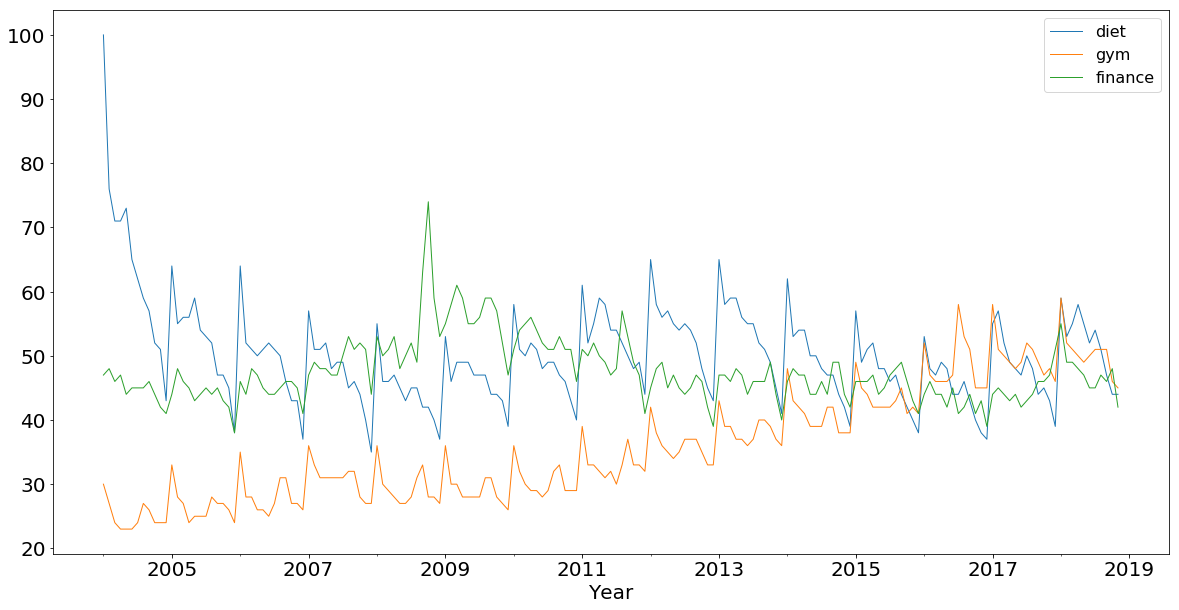

In [5]:
df.plot(figsize=(20,10), linewidth=1, fontsize=20) 
plt.xlabel('Year', fontsize=20)
plt.legend(fontsize=16)

#### <font color=brown> There are many ways of identifying trends in time series. One popular way is by taking a rolling average, which means for each time point, we take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose. </font>

####  <font color=brown> Here we check out this rolling average of "diet" using the built-in pandas methods. When it comes to determining the window size, it makes sense to first try out one of twelve months, as you're talking about yearly seasonality. </font>

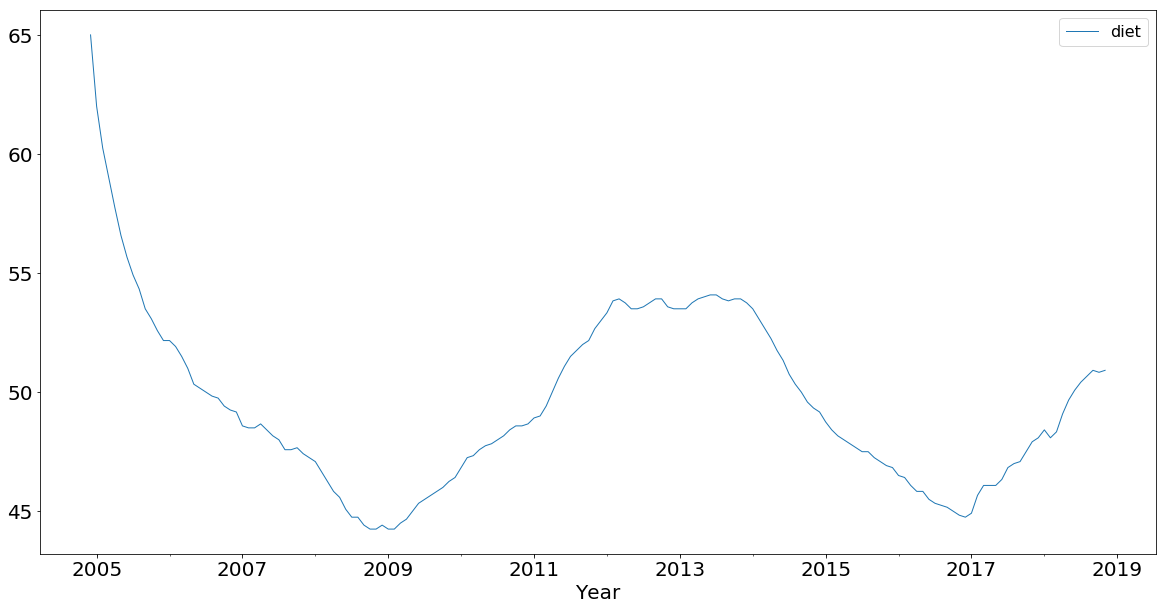

In [6]:
diet=df[['diet']] 
diet.rolling(12).mean().plot(figsize=(20,10),linewidth=1,fontsize=20) # 12 for 12 months
plt.xlabel('Year',fontsize=20)
plt.legend(fontsize=16)

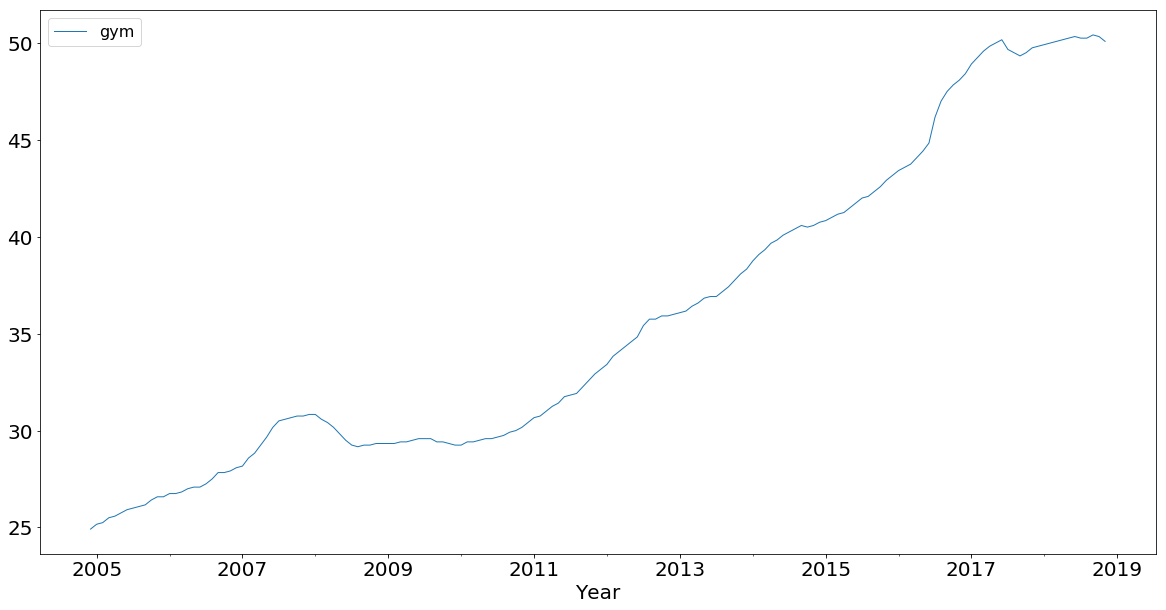

In [13]:
gym=df[['gym']] 
gym.rolling(12).mean().plot(figsize=(20,10),linewidth=1,fontsize=20) # 12 for 12 months (one year)
plt.xlabel('Year',fontsize=20)
plt.legend(fontsize=16)

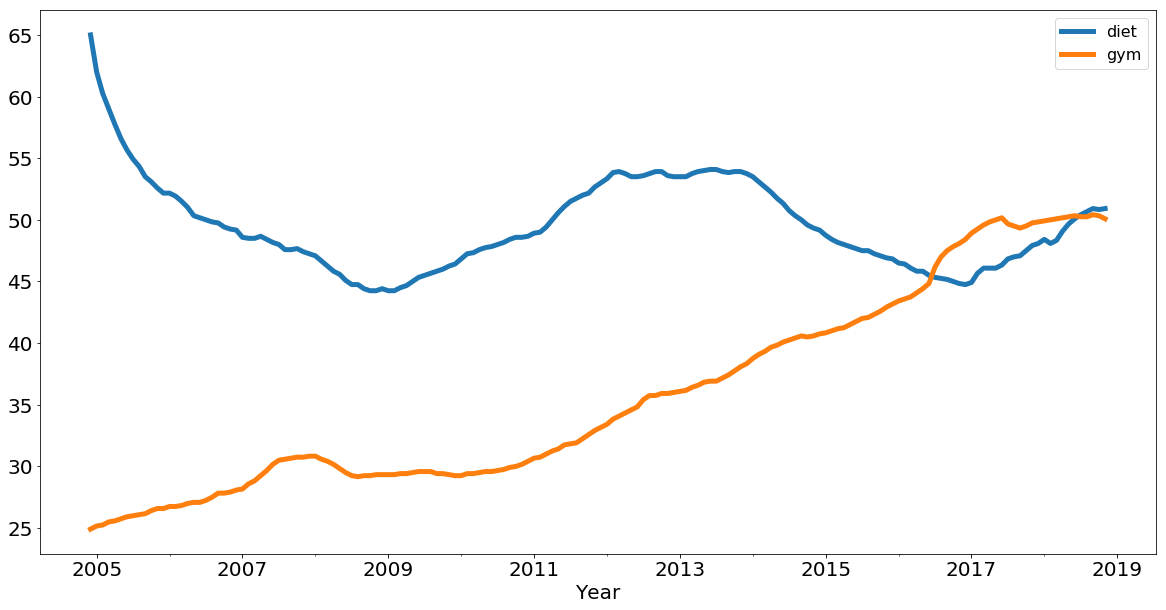

In [8]:
df_dg=pd.concat([diet.rolling(12).mean(),gym.rolling(12).mean()],axis=1) 
df_dg.plot(figsize=(20,10),linewidth=5,fontsize=20) 
plt.xlabel('Year',fontsize=20)
plt.legend(fontsize=16)

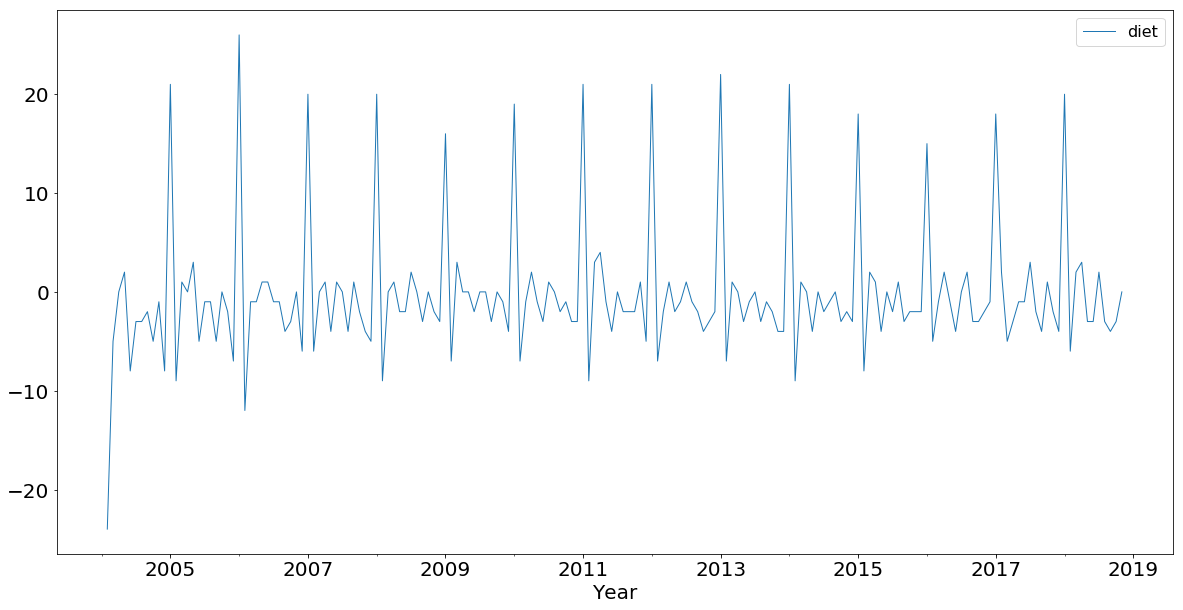

In [9]:
diet.diff().plot(figsize=(20,10),linewidth=1,fontsize=20) 
plt.xlabel('Year',fontsize=20)
plt.legend(fontsize=16)

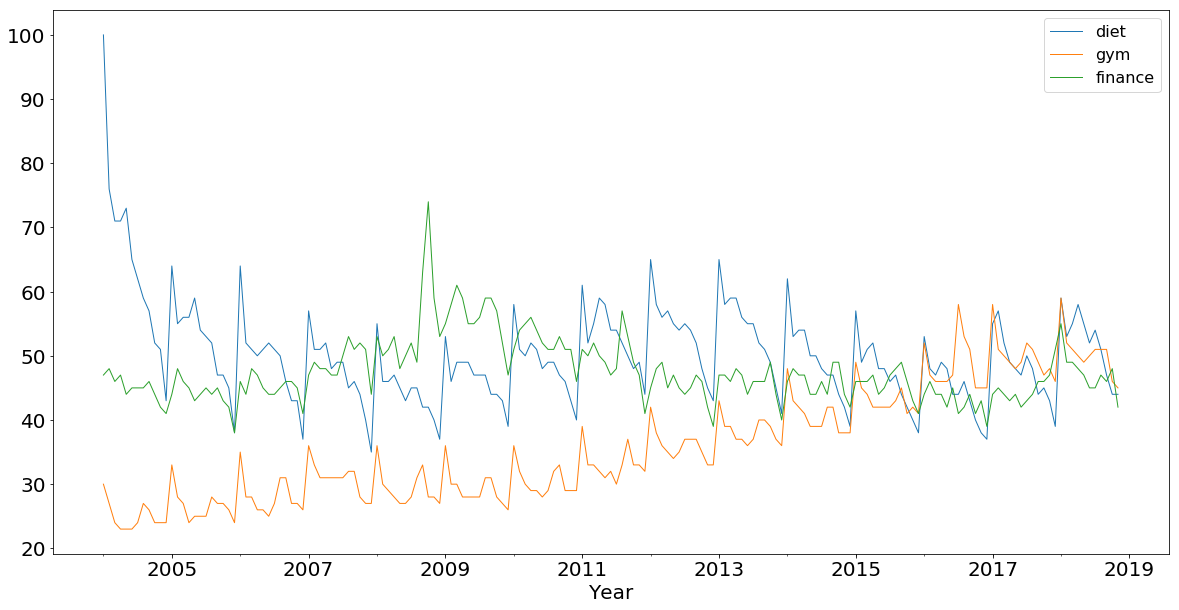

In [10]:
df.plot(figsize=(20,10),linewidth=1,fontsize=20) 
plt.xlabel('Year',fontsize=20)
plt.legend(fontsize=16)

In [14]:
corr=df.corr()
corr

,diet,gym,finance
diet,1.000000,-0.053519,-0.030548
gym,-0.053519,1.000000,-0.244868
finance,-0.030548,-0.244868,1.000000


#### <font color=brown> One way to think about the seasonal components to the time series of data is called "differencing," where we look at the difference between successive data points. That is called "first-order differencing" because we only look at the difference between one data point and the one before it. </font>
https://www.youtube.com/watch?v=sCkS-0kIRCE
> #### 1. corr = 1  means Strong positive relationship  : diet has a full correlation with itself (1.0)
> #### 2. corr = 0  means Not linearly correlated       : diet does not have a linear realation with gym (-0.053519)
> #### 3. corr = -1 means Strong negative relationship

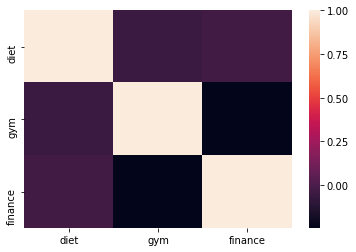

In [18]:
sb.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

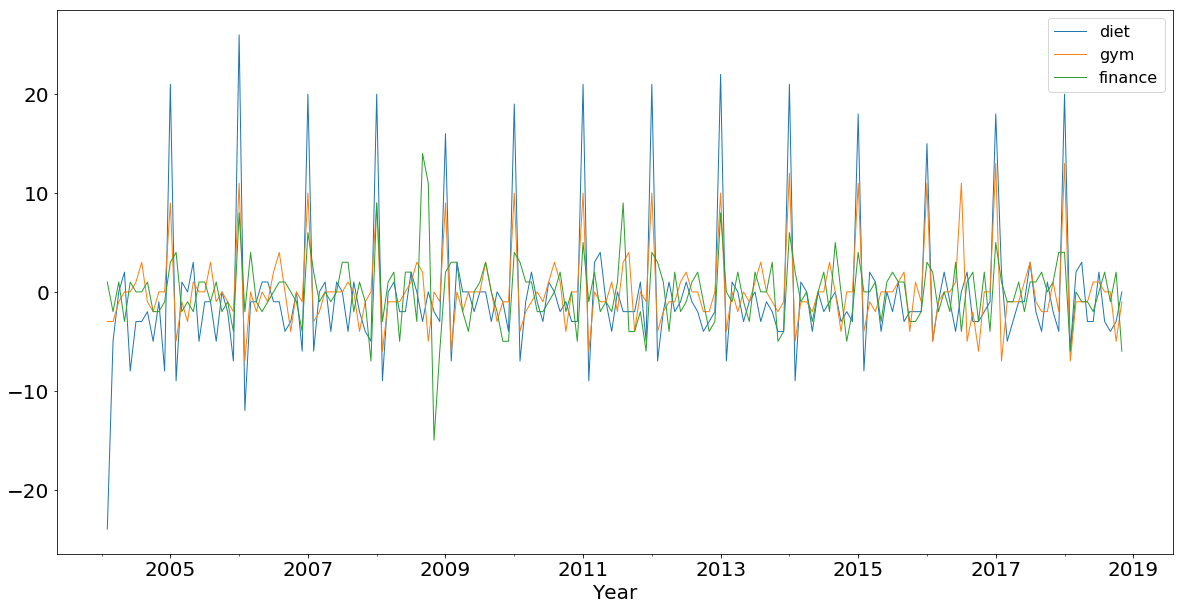

In [12]:
#First Order Differencing
df.diff().plot(figsize=(20,10),linewidth=1,fontsize=20) 
plt.xlabel('Year',fontsize=20)
plt.legend(fontsize=16)

### <font color=red> Conclusion </font>
In this part we have covered a lot of ground! You checked out Google trends data of keywords "diet" and "gym" and looked cursorily at "finance" to see how they vary over time. We covered concepts such as seasonality, trends, and correlation.